In [1]:
# Library import
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Loading the data**

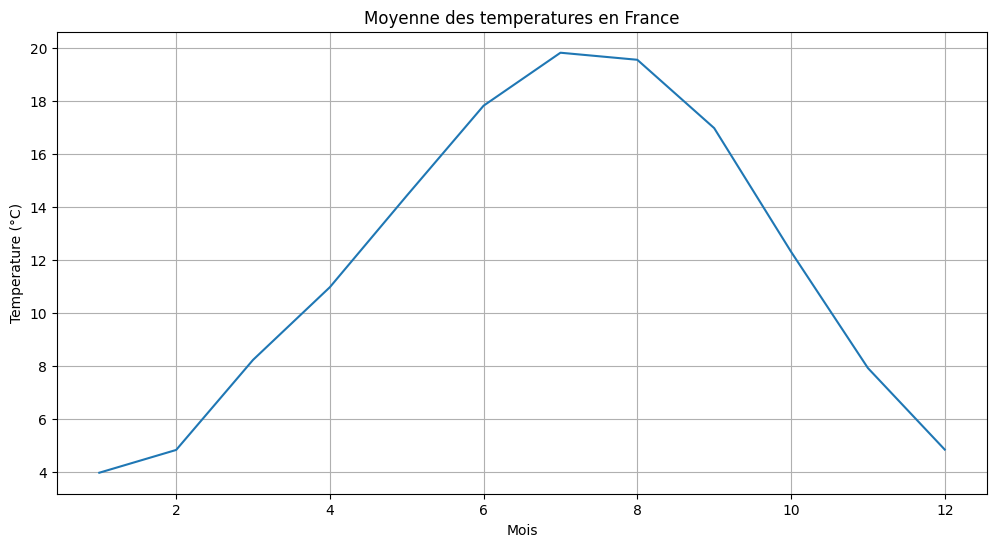

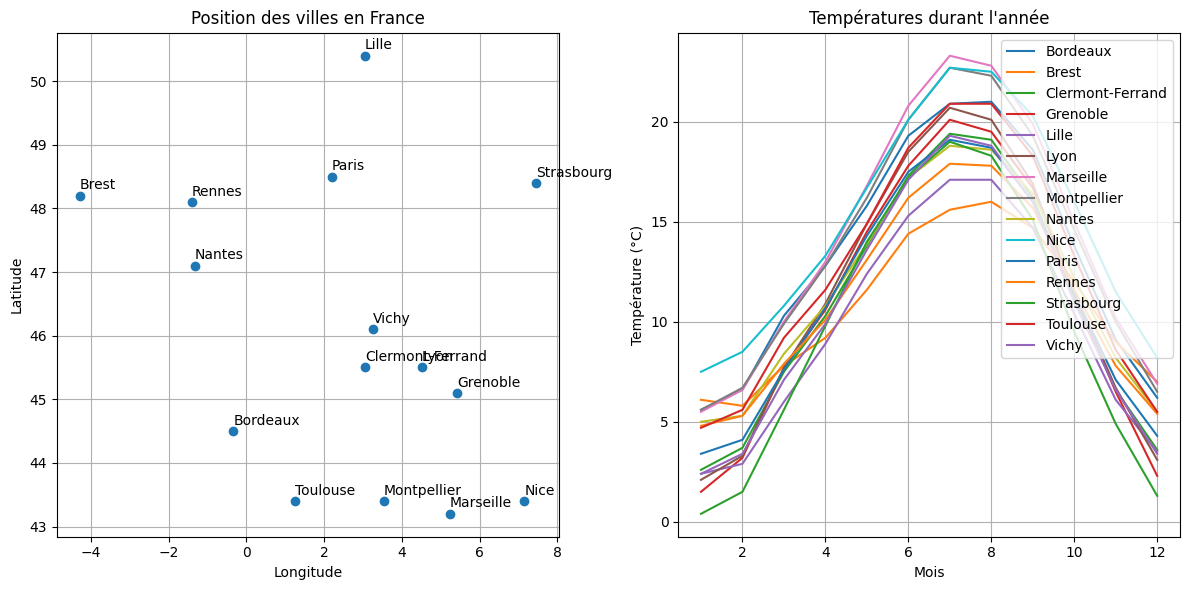

In [2]:
x1 = np.load("temper.npz")
temperature_data = x1['data'][:, :12]  # Sélection des températures
lat_long = x1['data'][:, 12:14]  # Sélection des latitudes et longitudes
cities = x1['villes']
varnames = x1['varname']

# Création des mois et des temperatures moyennes
months = np.arange(1, 13)
mean_temperature = np.zeros(12)
for i in range(12):
    mean_temperature[i] = np.mean(temperature_data[:, i])

# Graphique 1 : Première observation, moyennes des temperatures en France
plt.figure(figsize=(12, 6))
plt.plot(months, mean_temperature)
plt.xlabel("Mois")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.title("Moyenne des temperatures en France")

# Graphique 2.1 : Position des villes sur la carte
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(lat_long[:, 1], lat_long[:, 0])  # Longitude en x, Latitude en y
for i, city in enumerate(cities):
    plt.text(lat_long[i, 1], lat_long[i, 0]+0.1, city)  # Ajout du nom de la ville
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.title("Position des villes en France")

# Graphique 2.2 : Températures pendant l'année
plt.subplot(1, 2, 2)
for i in range(temperature_data.shape[0]):
    plt.plot(months, temperature_data[i, :], label=cities[i])
plt.xlabel("Mois")
plt.ylabel("Température (°C)")
plt.title("Températures durant l'année")
plt.grid(True)
plt.legend(loc='upper right')

# Afficher les graphiques
plt.tight_layout()
plt.show()

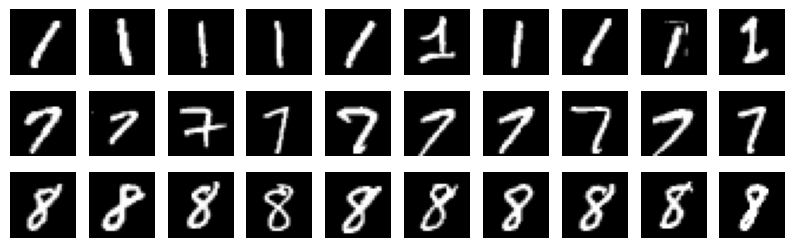

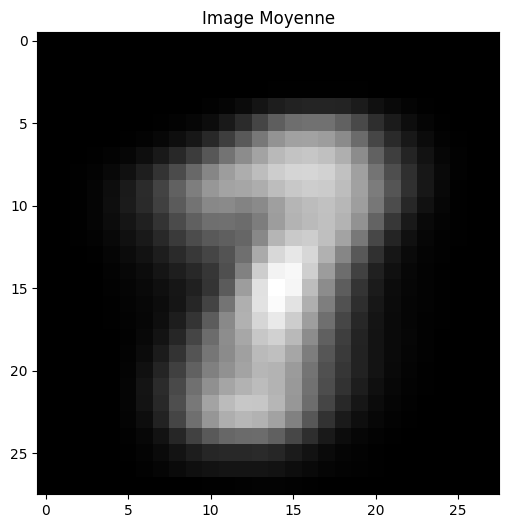

<Figure size 1200x600 with 0 Axes>

In [4]:
digits = np.load("digits.npz")
x2= digits['x']  # 3000 training sample, chaque colonne comporte une image (784 pixels).
y2 = digits['y'] # 3000 labels correspondants.


# Grille d'affichage
fig, axes = plt.subplots(3, 10, figsize=(10, 3))  # Création d'une grille 3x10 pour afficher les chiffres (1, 7, 8)

# Sélection des exemples pour chaque classe (1, 7, 8) et affichage
classes_to_display = [1, 7, 8]
images_per_class = 10


# Graphique 1 : Affichage de l'image moyenne
img_moy  = np.zeros(784)
for i in range(784):
    img_moy[i] = np.mean(x2[:,i])
img_moy = img_moy.reshape(28, 28)
plt.figure(figsize=(12, 6))
plt.title("Image Moyenne")
plt.imshow(img_moy, cmap='gray')


# Graphique 2 :Affichage les images des différentes classes
for class_index, class_label in enumerate(classes_to_display):
    # Trouver les indices des images correspondant à la classe actuelle
    class_indices = np.where(y2 == class_label)[0][:images_per_class]
    for i, img_index in enumerate(class_indices):
        ax = axes[class_index, i]
        # Reconstruire l'image 28x28 en respectant la transposition
        img = x2[img_index].reshape(28, 28)  # Reshape en 28x28 et transpose l'image
        ax.imshow(img, cmap='gray')
        ax.axis('off')

# Afficher les graphiques
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

### **2** / **CLUSTERING**

### **2.1 & 2.2** / **Temperature Dataset**


Clusters des villes de Frances en fonction de leurs températures:
Cluster 0: Brest, Nantes, Rennes
Cluster 1: Bordeaux, Marseille, Montpellier, Nice, Toulouse
Cluster 2: Clermont-Ferrand, Grenoble, Lille, Lyon, Paris, Strasbourg, Vichy


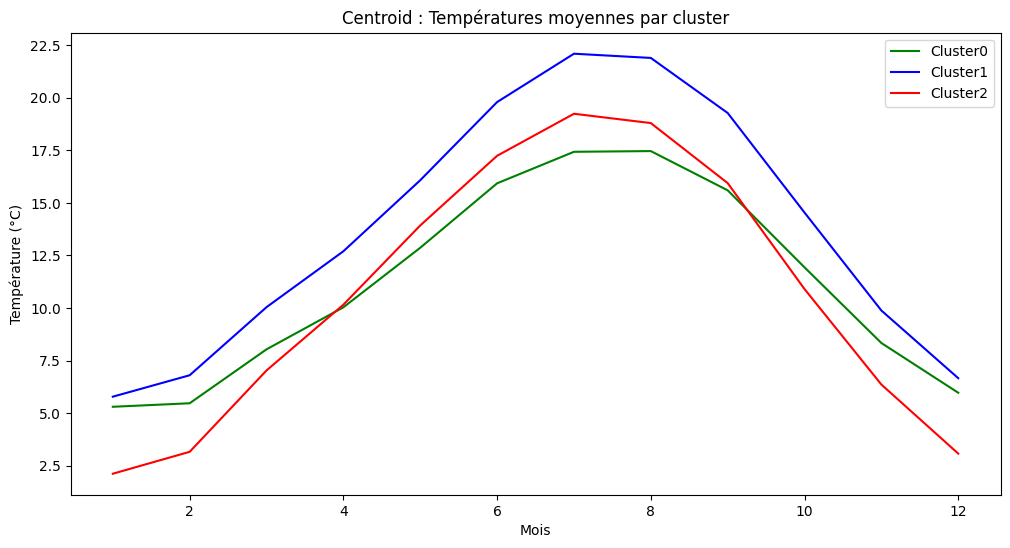

Text(0.5, 1.0, 'Position des villes en France : 3 clusters')

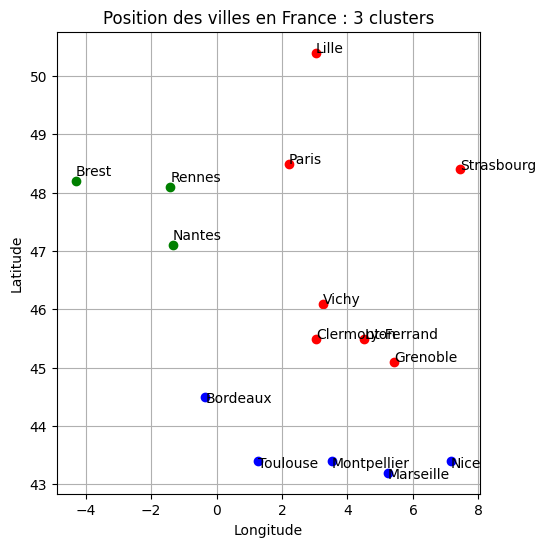

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.pyplot import subplots
import pandas as pd


### Clustering par ville de France en fonction de leurs temperature moyenne
kmeans_ville = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(temperature_data)

cities = x1['villes']  # Liste des noms de villes
clusters = kmeans_ville.labels_  # Cluster assignés par KMeans

# DataFrame pour grouper les villes par clusters
df_clusters = pd.DataFrame({'Ville': cities, 'Cluster': clusters})
grouped_cities = df_clusters.groupby('Cluster')['Ville'].apply(list)

# Centroid des clusters
centroid_temps = kmeans_ville.cluster_centers_

# Afficher les différents clusters
print("\nClusters des villes de Frances en fonction de leurs températures:")
for cluster, city_list in grouped_cities.items():
    print(f"Cluster {cluster}: {', '.join(city_list)}")


# Graphique 1 : Afficher les centroid de chaque cluster
plt.figure(figsize=(12, 6))
for i in range(3):
  if (i == 0):
    plt.plot(months, centroid_temps[i], label = f'Cluster{i}', color = 'green')
  if (i == 1):
    plt.plot(months, centroid_temps[i], label = f'Cluster{i}', color = 'blue')
  if (i == 2):
    plt.plot(months, centroid_temps[i], label = f'Cluster{i}', color = 'red')
plt.title("Centroid : Températures moyennes par cluster")
plt.legend(loc='upper right')
plt.xlabel("Mois")
plt.ylabel("Température (°C)")
plt.show()



# Graphique 2 : Position des villes sur la carte par cluster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
 # Longitude en x, Latitude en y
for i, city in enumerate(cities):
    if (city in grouped_cities[0]):
      plt.text(lat_long[i, 1], lat_long[i, 0]+0.1, city)  # Ajout du nom de la ville
      plt.scatter(lat_long[i, 1], lat_long[i, 0], color = 'green')
    if (city in grouped_cities[1]):
      plt.text(lat_long[i, 1], lat_long[i, 0]-0.1, city)  # Ajout du nom de la ville
      plt.scatter(lat_long[i, 1], lat_long[i, 0], color = 'blue')
    if (city in grouped_cities[2]):
      plt.text(lat_long[i, 1], lat_long[i, 0], city)  # Ajout du nom de la ville
      plt.scatter(lat_long[i, 1], lat_long[i, 0], color = 'red')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.title("Position des villes en France : 3 clusters")








Les clusters sont cohérents avec la géographie des villes et les climats respectifs de ces villes pour K=3.

En modifiant la valeur de K, les clusters peuvent parfois être trop larges ou, à l'inverse, trop détaillés, au point qu'un cluster ne contienne qu'une seule ville. La valeur de K=3 semble donc la plus appropriée.

Le résultat est cohérent avec la méthodologie KMeans utilisée. Ici, KMeans regroupe les villes qui ont peu d'amplitude de températures : Brest, Nantes et Rennes. Parmi les autres villes, l'algorithme identifie deux clusters en fonction de la température moyenne : les villes chaudes et les villes froides.

### **2.1 & 2.3** / **Digits Dataset**

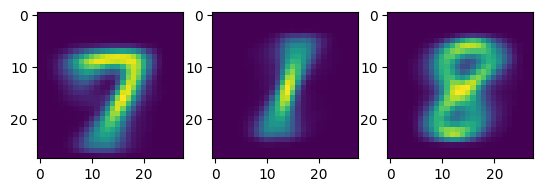

In [6]:
# KMeans avec K = 3 pour réaliser les clusters des digits
kmeans_digits = KMeans(n_clusters=3, random_state=0, n_init="auto")

# Fit du model KMeans aux données pour obtenir les clusters
clusters_digits = kmeans_digits.fit_predict(x2.astype(np.float32)) # Liste contenant des 0,1,2

# Calcul des centroid
centers = kmeans_digits.cluster_centers_

# Reshape pour avoir les images 28x28
imgs_centers = centers.reshape(-1, 28, 28)

# Graphique : Visualisation des clusters
fig, ax = subplots(1, 3)

for i, center in zip(ax.flat, imgs_centers):
    i.imshow(center)
plt.show()

Les centroids obtenues sont cohérentes avec les allures de chiffres attendues. Les chiffres 7, 1 et 8 sont lisibles, ce qui semble indiquer que les chiffres ont été correctement repartis entre les différents clusters.

Lorsque que l'on change le nombre de cluster, le résultat est altéré et les centroids ne correspondent plus à des chiffres lisibles (trop peu de cluster) ou alors on observe des chiffres identiques pour les centroid de clusters différents (trop de clusters). Il semble bien n'y avoir que 3 clusters à identifier dans ce dataset.

Les images obtenues n'appartiennent pas au dataset mais sont interpretables.

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

# Labels des clusters
labels = np.array([7,1,8])
labels_pred = np.zeros(y2.shape, dtype='int')

# On transforme l'information sur les clusters 0,1,2 en information sur les labels predits 7,1,8
for i in range(3):
    mask = (clusters_digits == i) # regarder ou sont les 0,1,2
    labels_pred[mask] = labels[i] # Associe le cluster 0 au chiffre 7, le cluster 1 au chiffre 1 et le cluster 2 au chiffre 8


# Calculate the accuracy
accuracy = (sum(y2 == labels_pred) / y2.size) * 100  # Calcul possible car les images étaient ordonnées
print("Accuracy: {0:.2f}%".format(accuracy[0])) # 90,83% de bonnes réponses pour 3 clusters

# Rand Score
rand_score = rand_score(y2.ravel(), labels_pred.ravel())
print("Rand Score: {0:.2f}".format(rand_score))

# Adjusted rand score
adjusted_rand_score = adjusted_rand_score(y2.ravel(), labels_pred.ravel())
print("Adjusted Rand Score: {0:.2f}".format(adjusted_rand_score))


Accuracy: 90.83%
Rand Score: 0.88
Adjusted Rand Score: 0.74


Le dataset étant ordonné, nous pouvons donner les labels et calculer une accuracy. Cette accuracy est proche de 91% ce qui témoigne d'une très bonne prédiction des chiffres.

Dans un cas général d'apprentissage non supervisé, lorsque le dataset est désordonné et que nous ne connaissons pas les labels, nous utilisons les indicateurs rand_score et adjusted_rand_score. Dans notre cas, les scores obtenus sont 0,88 et 0,74. Ces scores sont proches de 1 et témoignent d'une bonne prédiction, ils auraient permis une interprétation correcte des résultats.

Lorsque l'on change la valeur de K, les résultats sont significativement moins bons, ce qui confirme le choix de 3 clusters.

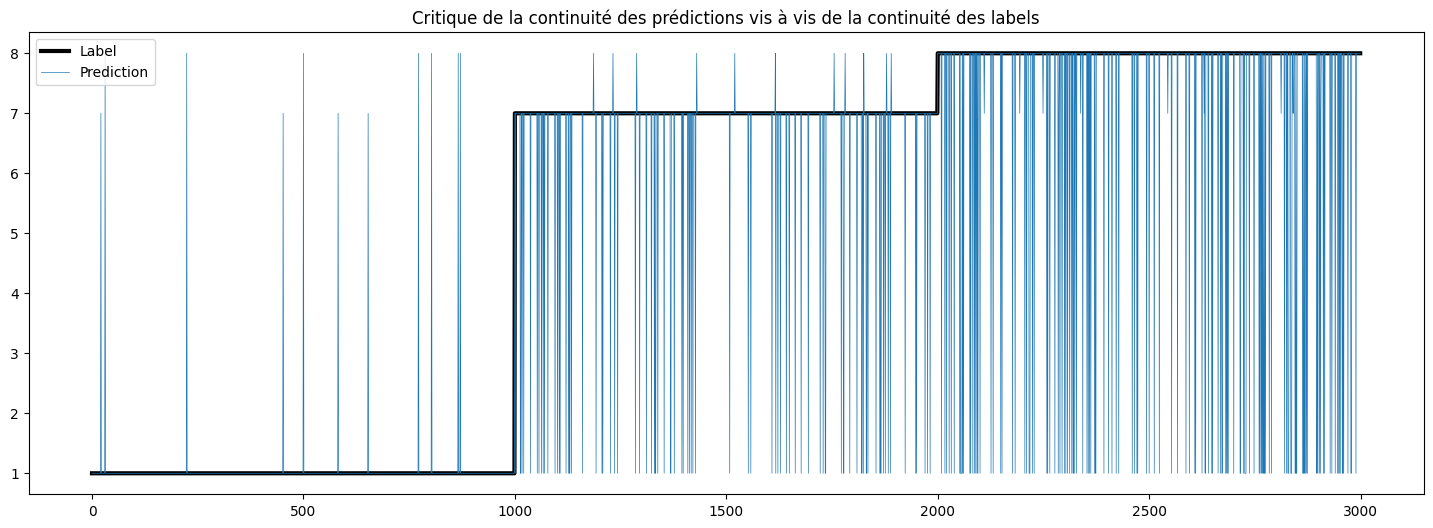

In [8]:
# Afficher la continuité des labels et la prédiction par clusters
plt.figure(figsize=(18, 6))
plt.plot(y2, label = f'Label', color = 'black', linewidth=3)
plt.plot(labels_pred, linewidth=0.5, label = f'Prediction')
plt.legend(loc='upper left')
plt.title("Critique de la continuité des prédictions vis à vis de la continuité des labels")
plt.show()

On observe que les images de 1, 7 et 8 sont groupées dans le dataset digits. La courbe bleue est donc continue par morceaux. Lorsque l'on observe la prediction, le comportement est sensiblement identique avec des erreurs de prédictions caractérisées par des pics locaux.

Interprétation :
- Les images "1" sont très bien prédites.
- Les images "7" sont correctement prédites, elle sont parfois confondues avec des "1" et très rarement confondues avec des "8".
- Les images "8" sont correctement prédites, elle sont parfois confondues avec des "1" et très rarement confondues avec des "7".

Pour obtenir une vue plus quantitative de ces erreurs, nous traçons la matrice de confusion ci-après.

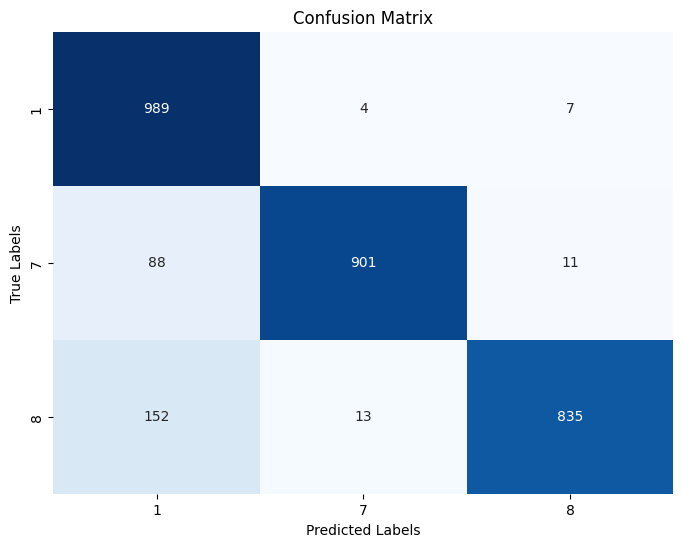

In [9]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# Calcul de la matrice de confusion
conf_matrix =  confusion_matrix(y2, labels_pred)

# Graphique : Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[1, 7, 8], yticklabels=[1, 7, 8])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Afficher la figure
plt.show()

Observation:

- Les 1 sont prédits 989 fois sur 1000, on prédit 4 fois un 7 et 7 fois un 8.
- Les 7 sont prédits 901 fois sur 1000, on prédit 88 fois un 1 et 11 fois un 8.
- Les 8 sont prédits 835 fois sur 1000, on prédit 152 fois un 1 et 13 fois un 7.

Ces observations quantitatives sont parfaitement cohérentes avec l'interprétation précédentes.



### **3** / **Density Estimation**

### **3.1** / **Temperature Dataset**

In [10]:
from sklearn.mixture import GaussianMixture

# Temperature dataset (K=2)
gmm_temperature = GaussianMixture(n_components=2, covariance_type='diag')
gmm_temperature.fit(temperature_data)
temperature_centers = gmm_temperature.means_

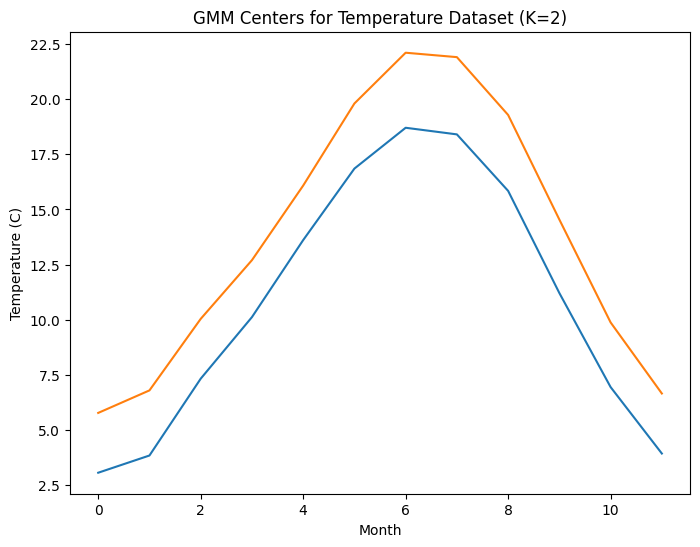

In [11]:
# Plotting Gaussian Mixture Centers for Temperature
plt.figure(figsize=(8, 6))
plt.plot(temperature_centers.T)  # Plot the centers
plt.title('GMM Centers for Temperature Dataset (K=2)')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()


# Interprétation et discussion sur la valeur de K

Pour K = 2, GMM identifie un cluster de villes froides et un cluster de villes chaudes qui ont une amplitude équivalente.

En modifiant la valeur pour K = 3, on obtient un résultat ressemblant à l'algorithme K-means utilisé dans la partie précédente, un troisième cluster avec un amplitude de température différente apparaît et les courbes se croisent.

En fonction des conclusions que l'on souhaite effectuer sur les données, le choix de K devra être adapté. En effet, si l'on souhaite simplement classer les villes en fonction de leurs températures moyennes sans prendre en compte l'amplitude des températures, K = 2 convient mais K = 3 pose des difficultés d'interprétations.

# Changement de covariance

Lorsque l'on modifie "covariance_type" pour d'autres formes de covariance telles que 'full' (pas de restriction sur la correlation entre les features) ou 'tied' (même matrice de covariance pour chaque composant, moins complexe), les résultats sont globalement inchangés sur cet exemple. Les temps de calculs restent très faibles dans chaque test.


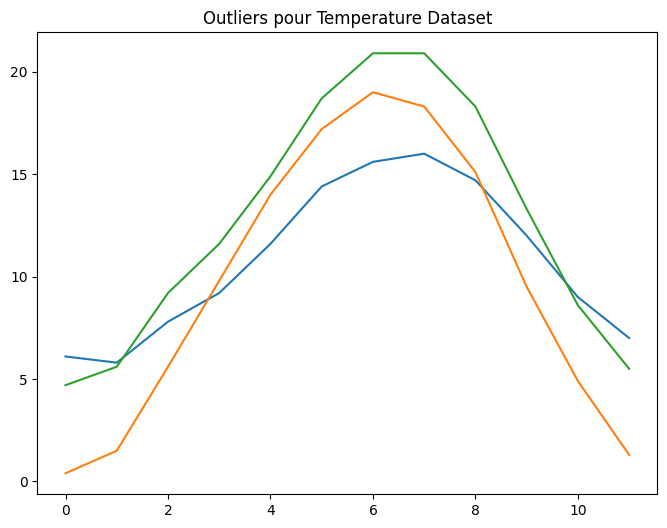

In [12]:
# Log proba pour la temperature
log_prob_temp = gmm_temperature.score_samples(temperature_data)

# Oultiers (samples with lowest probability)
outliers_temp = temperature_data[np.argsort(log_prob_temp)[:3]]  # Example : 3 echantillons moins probables

# Affichage des outliers
plt.figure(figsize=(8, 6))
plt.plot(outliers_temp.T)
plt.title('Outliers pour Temperature Dataset')
plt.show()

### **3.1** / **Digits Dataset**

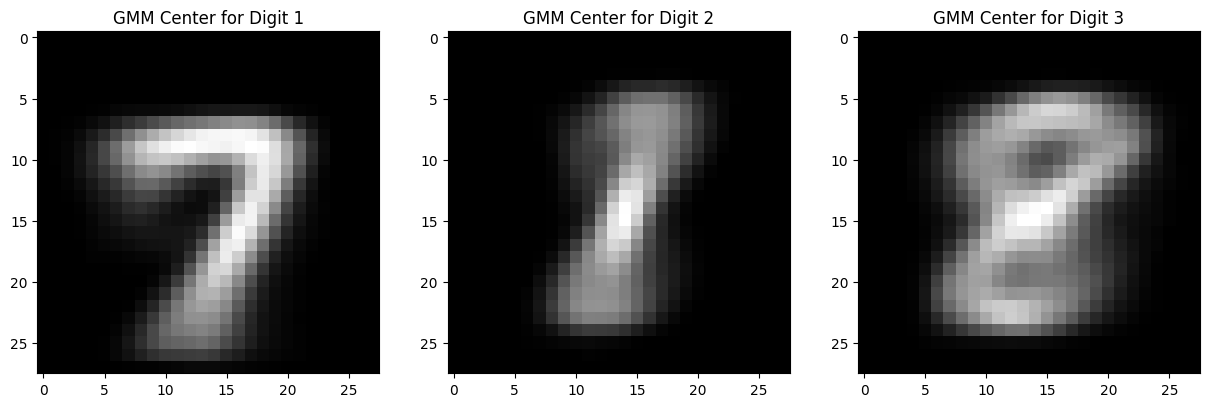

In [13]:
### Covariance DIAG

# Digits dataset (K=3)
gmm_digits = GaussianMixture(n_components=3, covariance_type='diag')
gmm_digits.fit(x2)
digits_centers = gmm_digits.means_

# Plotting Gaussian Mixture Centers for Digits
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, center in enumerate(digits_centers):
    axes[i].imshow(center.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'GMM Center for Digit {i+1}')
plt.show()

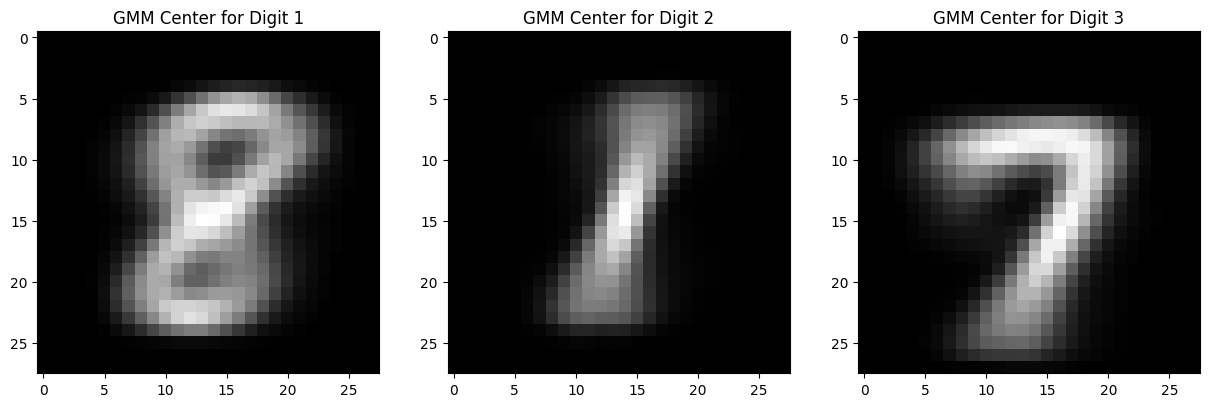

In [14]:
### Covariance FULL

# Digits dataset (K=3)
gmm_digits = GaussianMixture(n_components=3, covariance_type='full')
gmm_digits.fit(x2)
digits_centers = gmm_digits.means_

# Plotting Gaussian Mixture Centers for Digits
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, center in enumerate(digits_centers):
    axes[i].imshow(center.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'GMM Center for Digit {i+1}')
plt.show()

# Interprétation et discussion sur la valeur de K

De même que pour la partie précédente, les centroids obtenues sont cohérentes avec les allures de chiffres attendues. Les chiffres 7, 1 et 8 sont lisibles, ce qui semble indiquer que les chiffres ont été correctement repartis entre les différents clusters.

Lorsque que l'on change le nombre de cluster, le résultat est altéré et les centroids ne correspondent plus à des chiffres lisibles (trop peu de cluster) ou alors on observe des chiffres identiques pour les centroid de clusters différents (trop de clusters).

K = 3 semble être le choix le plus pertinent ici.


# Changement de covariance

Lorsque l'on modifie "covariance_type" pour une covariance 'full' (pas de restriction sur la correlation entre les features) les résultats semblent parfois légèrement meilleurs (centroids mieux lisibles) mais le temps de calcul augmente.  

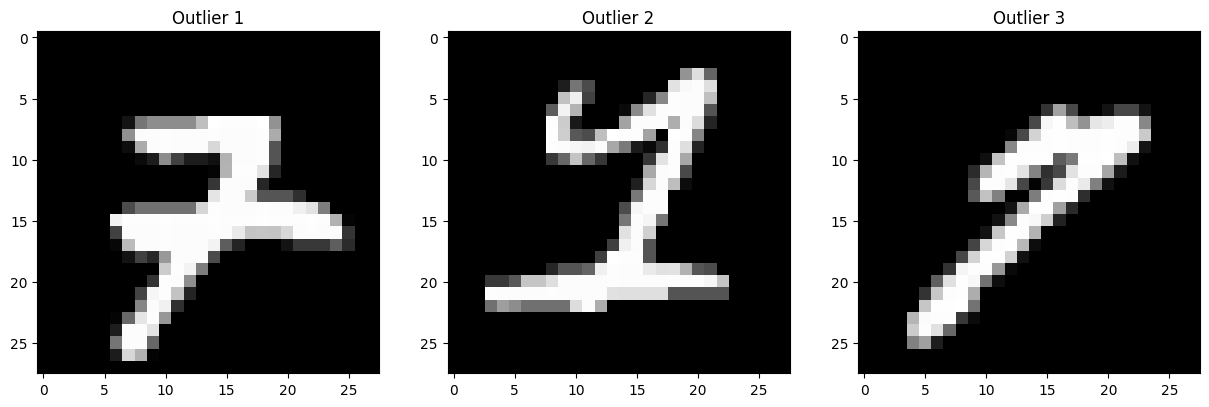

In [16]:
# Log proba pour les digits
log_prob_digits = gmm_digits.score_samples(x2)

# Oultiers (samples with lowest probability)
outliers_digits = x2[np.argsort(log_prob_digits)[:3]]  # Example : 3 echantillons moins probables

# Affichage des outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, outlier in enumerate(outliers_digits):
    axes[i].imshow(outlier.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Outlier {i+1}')
plt.show()

# Interprétation :

Les outliers obtenus sont effectivement très différents des centroids identifiées précédemment. Les chiffres sont difficilement lisibles ce qui explique leur position d'outliers.

In [21]:
from sklearn.metrics import adjusted_rand_score

clusters = gmm_digits.predict(x2)
labels = [8,1,7]
gmm_labels = np.zeros(y2.shape, dtype='int')

# On transforme l'information sur les clusters 0,1,2 en information sur les labels predits 7,1,8
for i in range(3):
    mask = (clusters == i) # regarder ou sont les 0,1,2
    gmm_labels[mask] = labels[i] # Associe le cluster 0 au chiffre 7, le cluster 1 au chiffre 1 et le cluster 2 au chiffre 8

# Adjusted rand score entre les labels predits et les vrais labels
adjusted_rand_score_gmm = adjusted_rand_score(y2.ravel(), gmm_labels.ravel())
print(f"Adjusted Rand Score for GMM: {adjusted_rand_score_gmm:.4f}")

Adjusted Rand Score for GMM: 0.6876


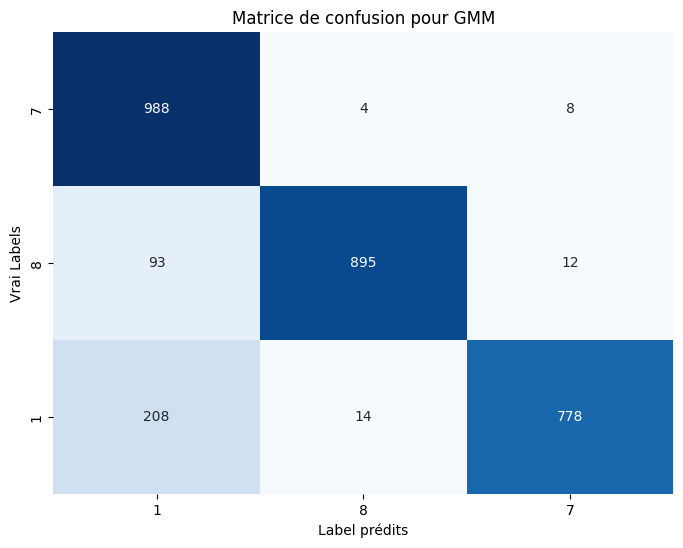

In [22]:
# Calcul de la matrice de confusion
conf_matrix =  confusion_matrix(y2, gmm_labels)

# Graphique : Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[1, 8, 7], yticklabels=[7, 8, 1])
plt.title('Matrice de confusion pour GMM')
plt.xlabel('Label prédits')
plt.ylabel('Vrai Labels')

# Afficher la figure
plt.show()

# Interprétation:

On observe que les prédictions obtenues avec GMM sont moins bonnes qu'avec K-means. En effet, le score "Adjusted Rand Score" est de 0,69 contre 0,74 pour K-means et la matrice de confusion confirme un taux d'erreurs plus élevé pour GMM.

Cela peut s'expliquer par le fait que GMM est plus flexible car il modélise chaque cluster comme une distribution gaussienne. Cependant, cette flexibilité supplémentaire peut parfois nuire à la performance si les données ne sont pas réellement bien modélisées par des distributions gaussiennes.

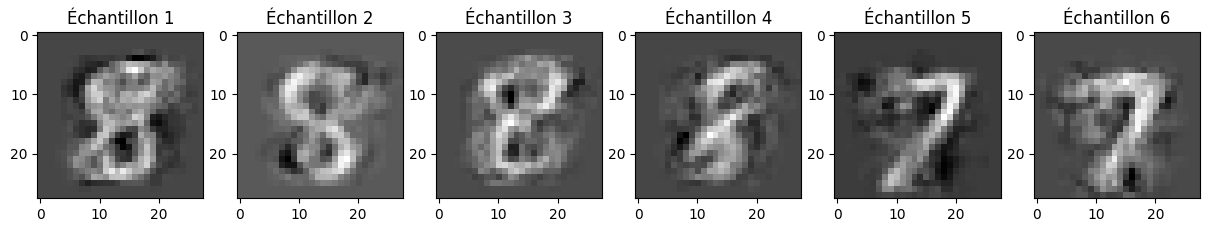

In [23]:
generated_samples, _ = gmm_digits.sample(6)

fig, axes = plt.subplots(1, 6, figsize=(15, 8))
for i, sample in enumerate(generated_samples):
    axes[i].imshow(sample.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Échantillon {i+1}')
plt.show()

Les samples générés par model.samples ne sont pas ressemblant aux échantillons. En revanche, on peut lire des chiffre sans problème sur ces samples.

### **4** / **Density Estimation**

### **4.1** / **Linear Projection : Principal Component Analysis for Temperature Dataset**

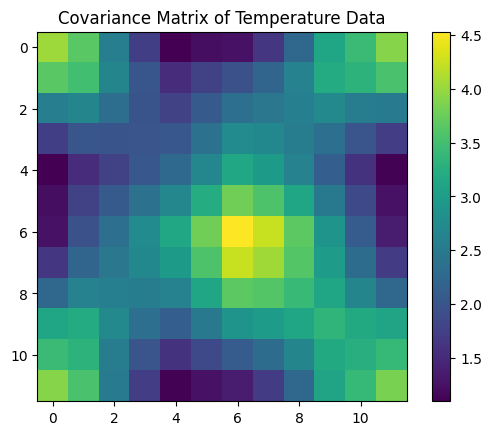

In [24]:
cov_matrix = np.cov(temperature_data.T)

# Plotting the covariance matrix
plt.imshow(cov_matrix, cmap='viridis')
plt.colorbar()
plt.title("Covariance Matrix of Temperature Data")
plt.show()

# Interprétation:

La diagonale de la matrice représente la variance de chaque mois (covariance d'un mois avec lui-même). Ces valeurs sont relativement élevées, surtout pour les mois 6 à 8 (les mois d'été), ce qui indique des variations plus importantes des températures pendant cette période.

Les éléments hors diagonale montrent la covariance entre les différents mois, ce qui explique que les covariances associées soient plus faibles.

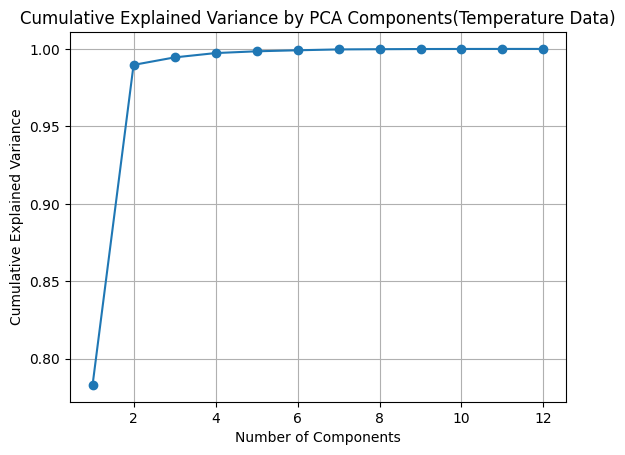

In [27]:
from sklearn.decomposition import PCA

pca_temp = PCA(n_components=None)
pca_temp.fit(temperature_data)

explained_variance = pca_temp.explained_variance_ratio_


plt.plot(np.arange(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.title("Cumulative Explained Variance by PCA Components(Temperature Data)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Il y a un total de 12 composantes possibles pour le dataset temperatures (nombre de mois)

L'axe Y représente la proportion cumulée de la variance expliquée par les composantes. Une valeur de 1.0 signifie que toute la variance des données est expliquée.

Ici, en utilisant la totalité des composantes, on explique la variance des données complètement.

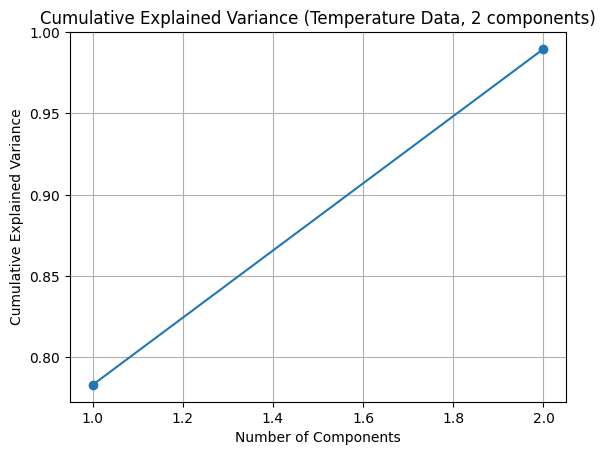

In [28]:
pca_temp_2 = PCA(n_components=2)
pca_temp_2.fit(temperature_data)

explained_variance = pca_temp_2.explained_variance_ratio_


plt.plot(np.arange(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.title("Cumulative Explained Variance (Temperature Data, 2 components)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

La première composante principale capture environ 80 % de la variance totale des données. Cela signifie que cette seule composante est capable de capturer l'essentiel des variations de température dans les différentes villes. Cela indique que les variations de température dans les différentes villes sont fortement corrélées à une seule direction principale dans l'espace des données (la variation saisonnière annuelle).

L'ajout de la deuxième composante principale permet de capturer presque toute la variance restante.

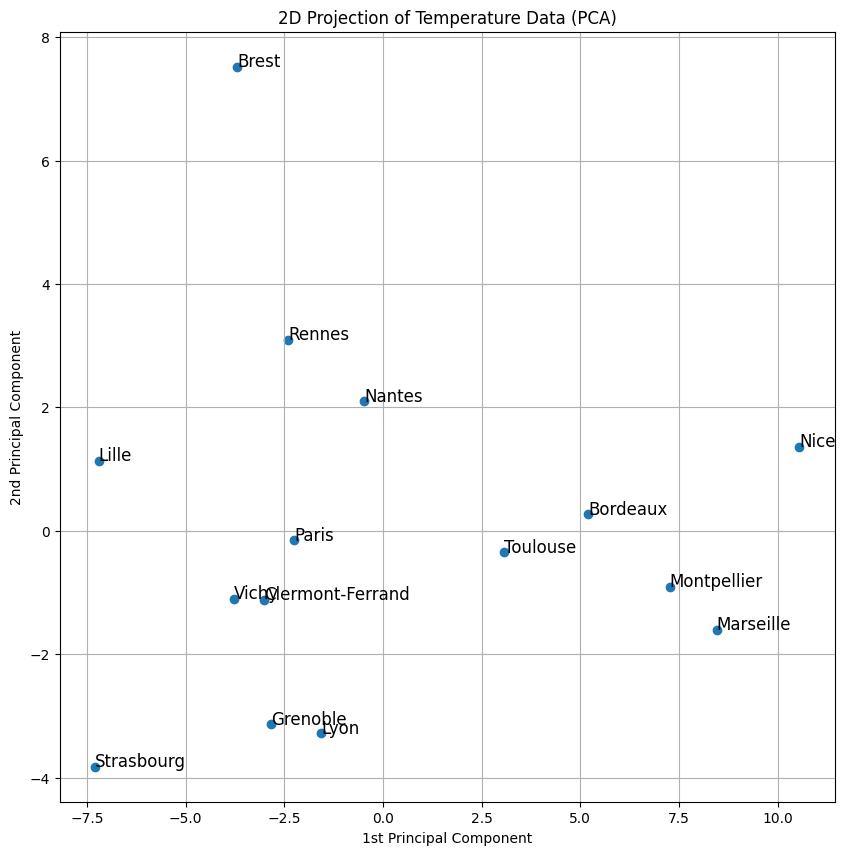

In [29]:
x1_projected_2D = pca_temp.transform(temperature_data)[:, :2]

plt.figure(figsize=(10, 10))
plt.scatter(x1_projected_2D[:, 0], x1_projected_2D[:, 1])
for i, city in enumerate(cities):
    plt.text(x1_projected_2D[i, 0], x1_projected_2D[i, 1], city, fontsize=12)

plt.title("2D Projection of Temperature Data (PCA)")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.grid(True)
plt.show()

1ère composante principale (axe X) : Cette composante capte la majorité de la variance (environ 80 %). Elle semble représenter un gradient de température générale, où des villes comme Nice et Marseille (températures plus élevées) sont situées à l'extrémité droite, tandis que des villes comme Brest ou Lille (températures plus basses) se trouvent à gauche.

2ème composante principale (axe Y) : Cette composante ajoute une variance plus fine (environ 20 % de la variance totale) et pourrait être liée à des variations saisonnières spécifiques ou des aspects géographiques plus particuliers.

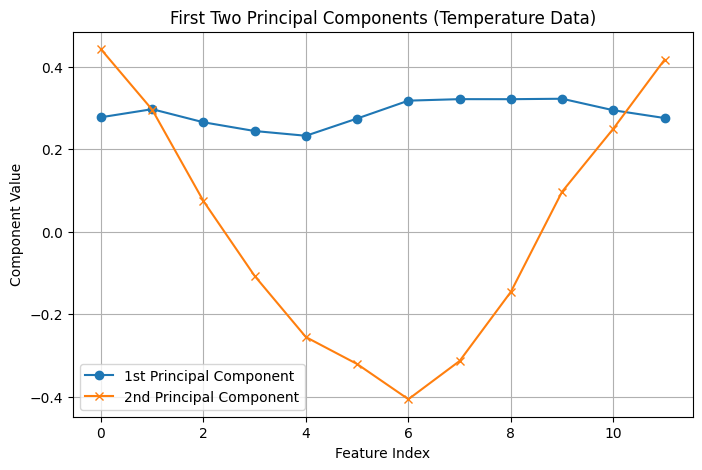

In [30]:
components = pca_temp.components_[:2, :]

plt.figure(figsize=(8, 5))
plt.plot(components[0], label="1st Principal Component", marker='o')
plt.plot(components[1], label="2nd Principal Component", marker='x')
plt.title("First Two Principal Components (Temperature Data)")
plt.xlabel("Feature Index")
plt.ylabel("Component Value")
plt.legend()
plt.grid(True)
plt.show()

La première composante varie peu : cela confirme que cette composante capture une tendance générale de la température tout au long de l'année, sans variations extrêmes. Elle représente principalement une moyenne annuelle des températures dans les différentes villes.

La deuxième composant met en avant un variation marquée : cela indique que la deuxième composante capture des variations saisonnières. Un mouvement le long de cette composante correspond à une augmentation ou une diminution des différences entre les températures d'hiver et d'été. Cela confirme notre première interprétation.

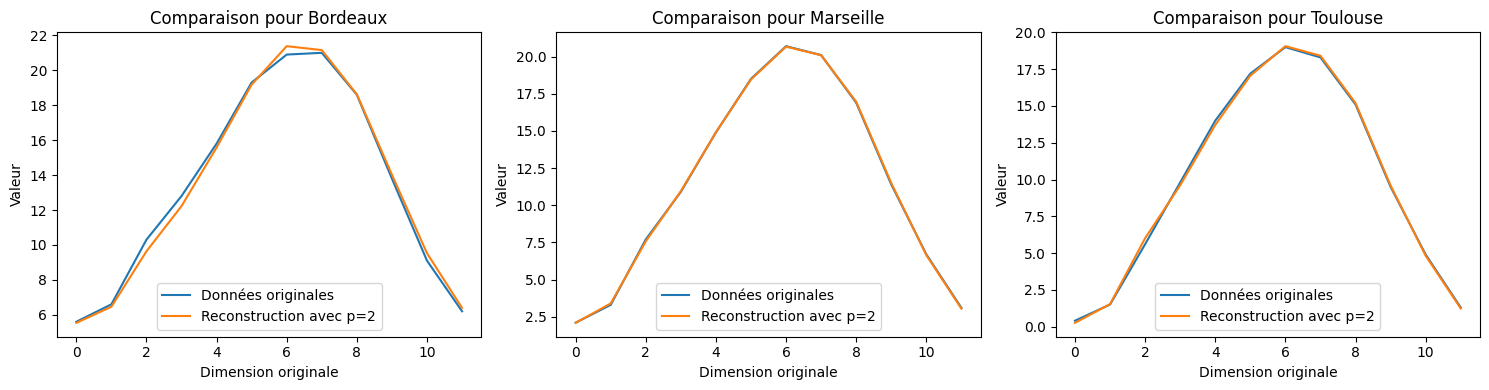

In [63]:
x_reconstructed = pca_temp.inverse_transform(np.hstack((x1_projected_2D, np.zeros((x1_projected_2D.shape[0], temperature_data.shape[1] - 2)))))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(temperature_data[0, :], label='Données originales')
axes[0].plot(x_reconstructed[0, :], label=f'Reconstruction avec p=2')
axes[0].set_title('Comparaison pour Bordeaux')
axes[0].set_xlabel('Dimension originale')
axes[0].set_ylabel('Valeur')
axes[0].legend()

axes[1].plot(temperature_data[5, :], label='Données originales')
axes[1].plot(x_reconstructed[5, :], label=f'Reconstruction avec p=2')
axes[1].set_title('Comparaison pour Marseille')
axes[1].set_xlabel('Dimension originale')
axes[1].set_ylabel('Valeur')
axes[1].legend()

axes[2].plot(temperature_data[12, :], label='Données originales')
axes[2].plot(x_reconstructed[12, :], label=f'Reconstruction avec p=2')
axes[2].set_title('Comparaison pour Toulouse')
axes[2].set_xlabel('Dimension originale')
axes[2].set_ylabel('Valeur')
axes[2].legend()

plt.tight_layout()
plt.show()

La reconstruction permise par model.inverse_transform() semble être très bonne pour p=2. Ceci est attendu car la PCA permettant d'expliquer toute la variance avec uniquement les deux composantes principales.

### **4.1** / **Linear Projection : Principal Component Analysis for Digits Dataset**

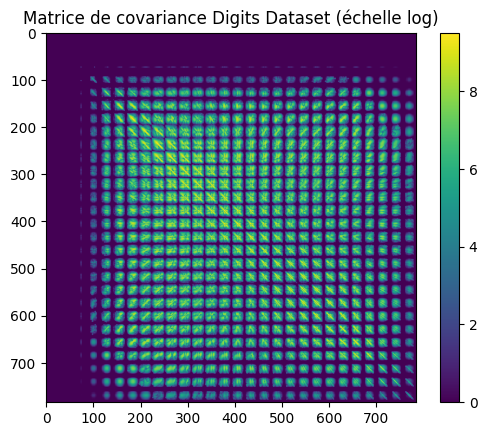

In [31]:
# Matrice de covariance
cov_matrix_digits = np.cov(x2.T)

# Affichage
plt.imshow(np.log1p(np.abs(cov_matrix_digits)), cmap='viridis')
plt.colorbar()
plt.title("Matrice de covariance Digits Dataset (échelle log)")
plt.show()

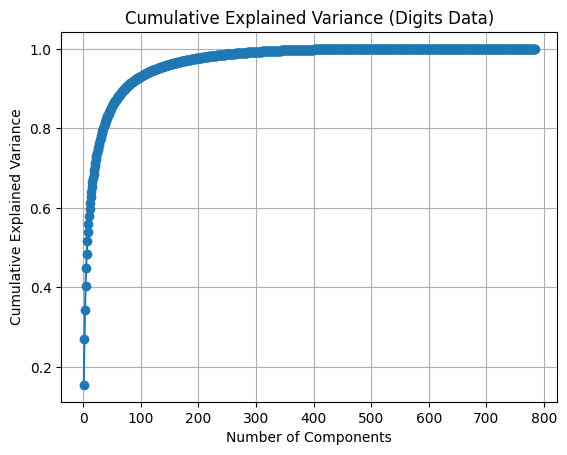

In [32]:
pca_digits = PCA(n_components=None)
pca_digits.fit(x2)

# Explained Variance Ratio
explained_variance_digits = pca_digits.explained_variance_ratio_

# Plotting the explained variance ratio
plt.plot(np.arange(1, len(explained_variance_digits) + 1), np.cumsum(explained_variance_digits), marker='o')
plt.title("Cumulative Explained Variance (Digits Data)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Il y a un total de 784 composantes possibles pour le dataset digits (chiffres), car chaque image est représentée par 784 pixels (28x28).

L'axe Y représente la proportion cumulée de la variance expliquée par les composantes. Une valeur de 1.0 signifie que toute la variance des données est expliquée.

Ici, en utilisant la totalité des composantes, on explique la variance des données complètement.

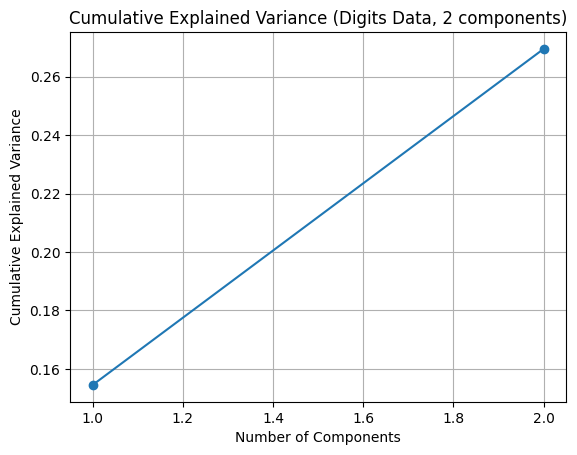

In [33]:
pca_digits_2 = PCA(n_components=2)
pca_digits_2.fit(x2)


explained_variance_digits = pca_digits_2.explained_variance_ratio_

# Affichage
plt.plot(np.arange(1, len(explained_variance_digits) + 1), np.cumsum(explained_variance_digits), marker='o')
plt.title("Cumulative Explained Variance (Digits Data, 2 components)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Dans cette nouvelle figure, on observe que la PCA avec uniquement deux composant explique uniquement 27% de la variance.

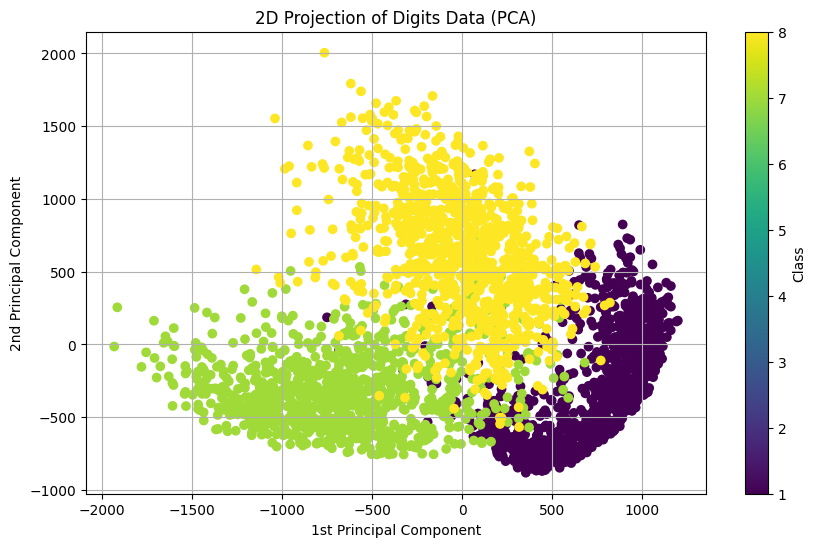

In [35]:
x2_projected_2D = pca_digits.transform(x2)[:, :2]

# Affichage
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x2_projected_2D[:, 0], x2_projected_2D[:, 1], c=y2, cmap='viridis')
plt.title("2D Projection of Digits Data (PCA)")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.grid(True)
plt.colorbar(scatter, label="Class")
plt.show()

La projection montre que les chiffres de différentes classes tendent à se regrouper ensemble, ce qui est un signe que ces classes sont relativement bien séparées.

On peut observer que les points dans chaque groupe sont relativement dispersés, ce qui indique une certaine variabilité dans les différentes classes, c'est-à-dire que les chiffres d'une même classe (par exemple, les différents 7) ne sont pas tous identiques. Cependant, ils sont suffisamment similaires pour rester groupés.

1ère composante principale (axe X) : Cette composante semble capturer la majeure partie de la variance entre les classes. On observe une certaine séparation horizontale.
2ème composante principale (axe Y) : Cette composante ajoute une deuxième dimension de séparation entre les chiffres.

Les deux composantes permettent de créer des groupes peu confus et d'envisager des clusters.



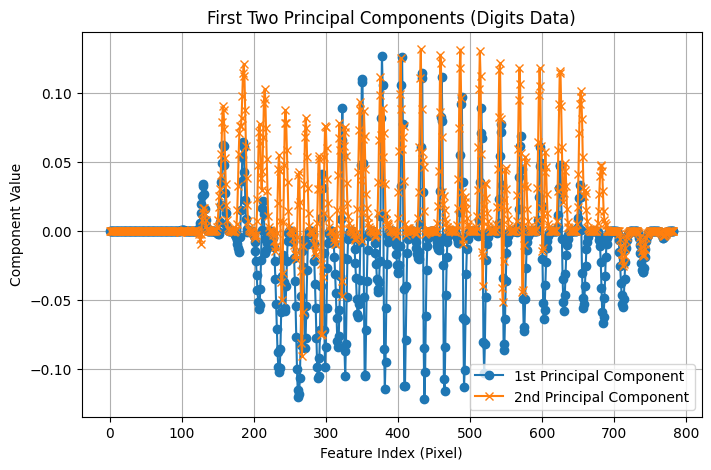

In [36]:
components_digits = pca_digits.components_[:2, :]

plt.figure(figsize=(8, 5))
plt.plot(components_digits[0], label="1st Principal Component", marker='o')
plt.plot(components_digits[1], label="2nd Principal Component", marker='x')
plt.title("First Two Principal Components (Digits Data)")
plt.xlabel("Feature Index (Pixel)")
plt.ylabel("Component Value")
plt.legend()
plt.grid(True)
plt.show()

La première composante principale capture des variations globales et marquées qui correspondent probablement à la structure de base des chiffres.

Certains pic importants localisés pour la deuxième composante principale pourrait laisser imaginer que cette composante permet d'identifier des propriétés plus locales et de discriminer des différences plus fines entre les chiffres manuscrits.

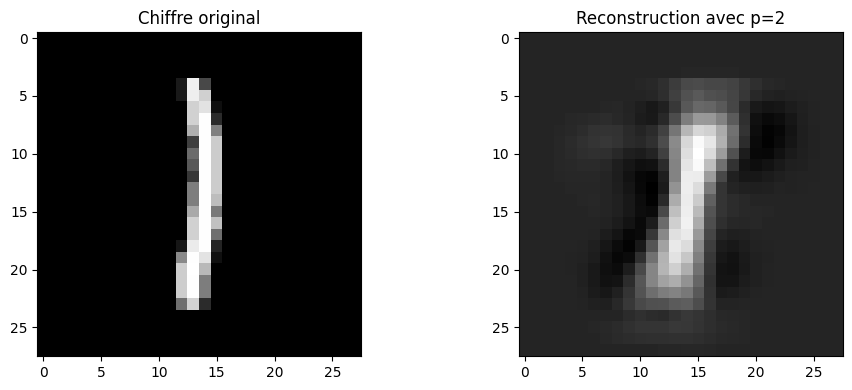

In [84]:
x2_reconstructed = pca_digits.inverse_transform(np.hstack((x2_projected_2D, np.zeros((x2_projected_2D.shape[0], x2.shape[1] - 2)))))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Exemple 1: Chiffre avec indice 0
axes[0].imshow(x2[10].reshape(28, 28), cmap='gray')
axes[0].set_title('Chiffre original')

# Reconstruction pour l'exemple 1
axes[1].imshow(x2_reconstructed[10].reshape(28, 28), cmap='gray')
axes[1].set_title(f'Reconstruction avec p=2')


plt.tight_layout()
plt.show()

Sur les exemples testés, la reconstruction est cohérente mais imparfaite par rapport au dataset température pour p=2, cela est cohérent avec les résultats précédents.


### **4.2** / **Manifold Learning : TSNE**

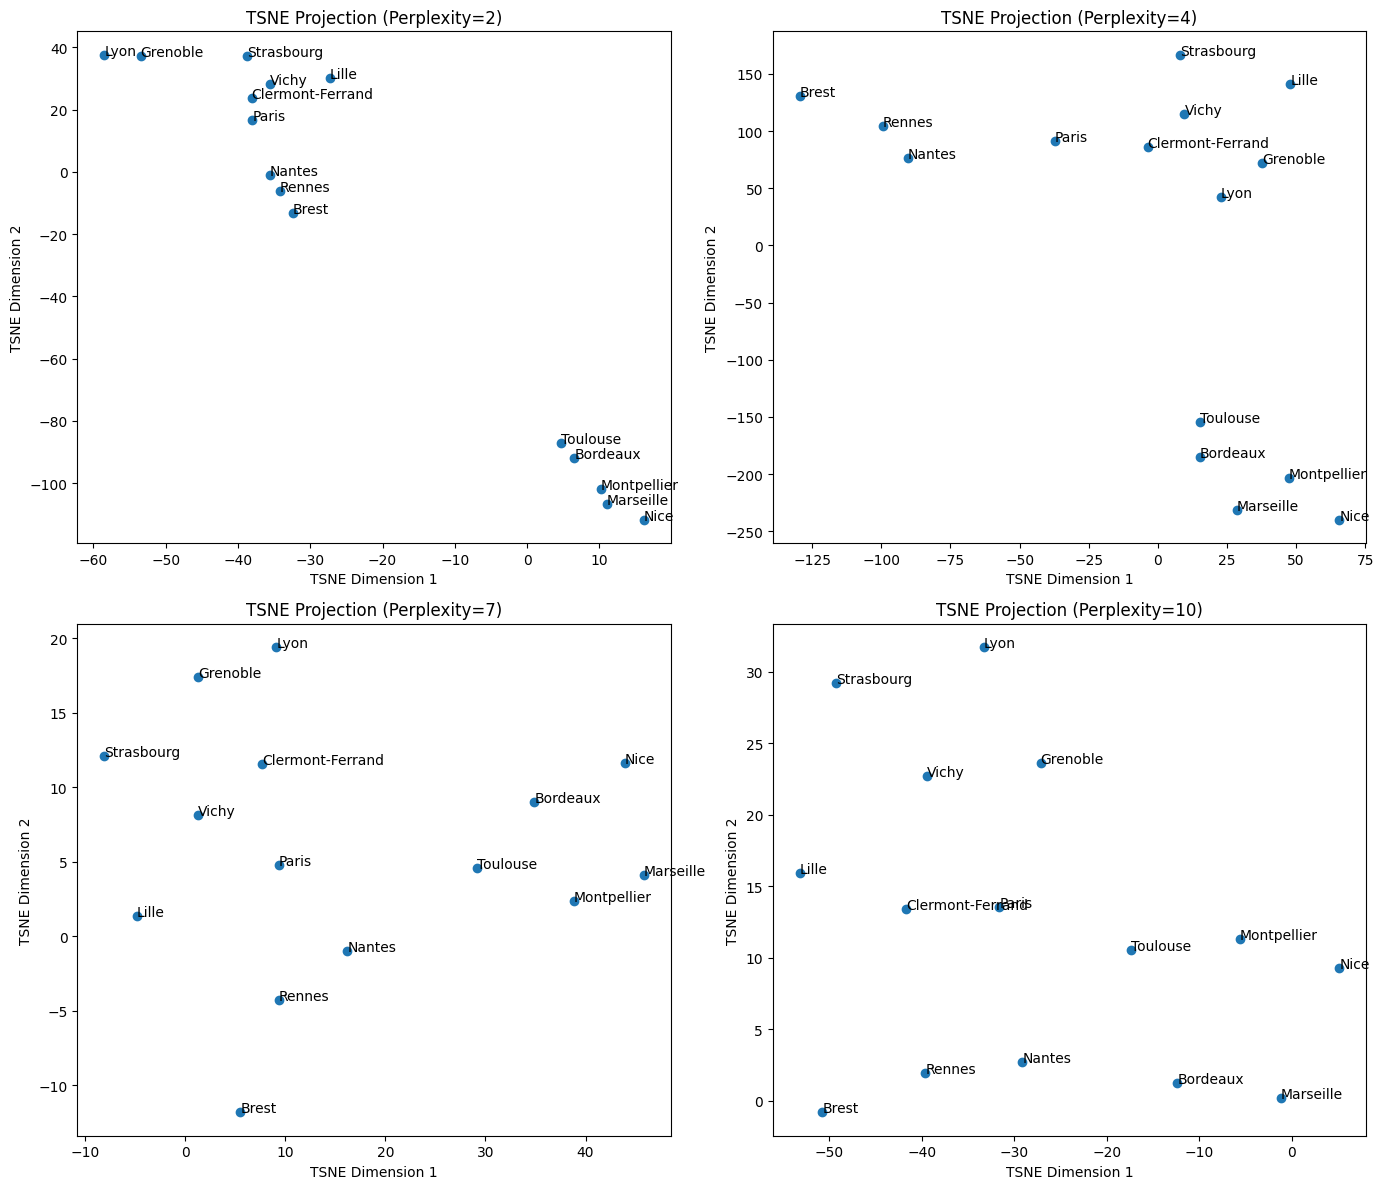

In [46]:
from sklearn.manifold import TSNE

perplexities = [2, 4, 7, 10]


fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, perplexity in enumerate(perplexities):
    tsne_temp = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    temp_tsne_proj = tsne_temp.fit_transform(temperature_data)

    ax = axes[idx // 2, idx % 2]
    ax.scatter(temp_tsne_proj[:, 0], temp_tsne_proj[:, 1])

    for i, city in enumerate(cities):
        ax.text(temp_tsne_proj[i, 0], temp_tsne_proj[i, 1], city)

    ax.set_title(f'TSNE Projection (Perplexity={perplexity})')
    ax.set_xlabel('TSNE Dimension 1')
    ax.set_ylabel('TSNE Dimension 2')

plt.tight_layout()
plt.show()

Avec TSNE les distances globales ne sont pas nécessairement préservées, donc deux points qui sont éloignés dans l'espace réduit ne sont pas forcément très éloignés dans l'espace original. Ainsi les positions géographiques de villes ne sont pas retrouvées aussi bien qu'avec la PCA.

Dans cette projection, TSNE a regroupé certaines villes comme Nice, Montpellier, et Marseille, probablement parce que ces villes ont des températures similaires pendant l'année. Le reglage de la perplexité permet d'identifier des cluters de façon nette. Une perplexité de 2 permet d'identifier clairement deux clusters : villes chaudes et villes froides.  Lorsque la pexplexité augmente trop, il devient difficile d'identifier des clusters.



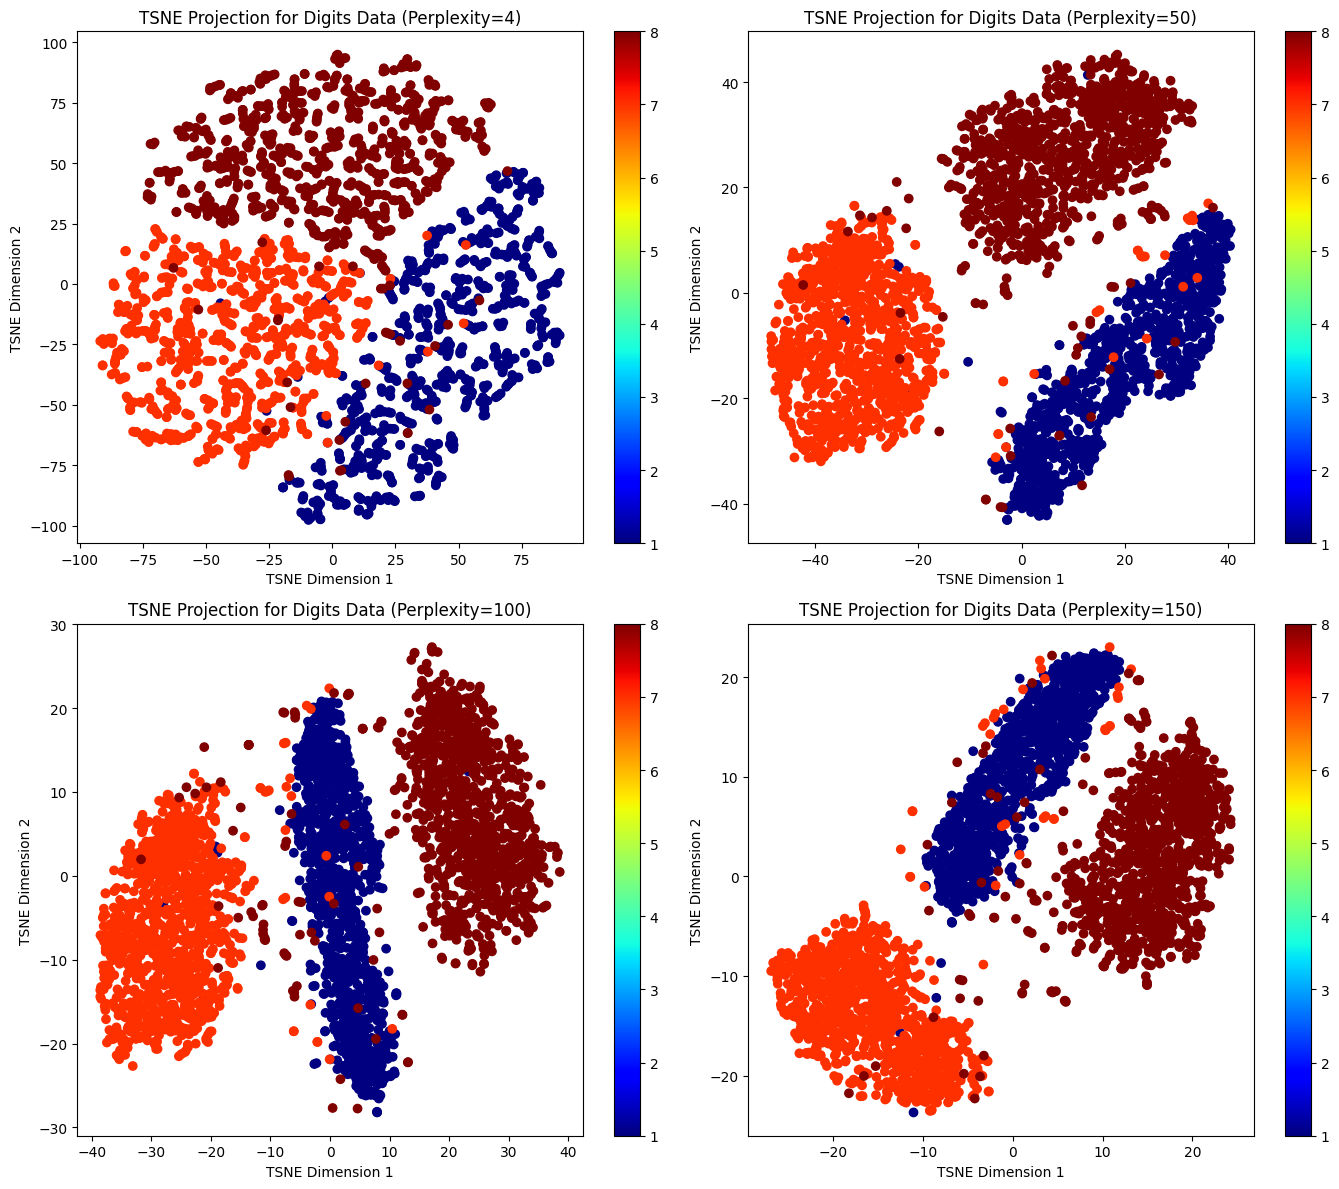

In [47]:
perplexities = [4, 50, 100, 150]


fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, perplexity in enumerate(perplexities):
    tsne_digits = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    digits_tsne_proj = tsne_digits.fit_transform(x2)

    ax = axes[idx // 2, idx % 2]
    scatter = ax.scatter(digits_tsne_proj[:, 0], digits_tsne_proj[:, 1], c=y2, cmap='jet', label=y2)

    ax.set_title(f'TSNE Projection for Digits Data (Perplexity={perplexity})')
    ax.set_xlabel('TSNE Dimension 1')
    ax.set_ylabel('TSNE Dimension 2')

    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

Pour ce dataset, TSNE est très efficace pour trouver des regroupements locaux et fait ressortir des clusters plus facilement que la PCA. Quelque soit la valeur de la perplexité, les clusters sont nets ici pour les 3 digits:


# Inflence de la perplexité

Si la perplexité est faible, TSNE se concentre davantage sur les relations très locales entre les points. Cela peut mener à des clusters très denses dans la projection finale, mais cela pourrait ignorer les structures globales.

Si la perplexité est élevée, TSNE essaie de prendre en compte un plus grand nombre de points voisins lors de la construction des relations entre les points. Cela peut mieux capturer les structures globales des données, mais les relations locales peuvent être moins précises.

## Conclusion:
Dans ce TP dédié à l'apprentissage non supervisé, plusieurs méthodes ont été explorées, notamment la clustering K-Means, la réduction de dimensionnalité avec PCA, T-SNE, ainsi que l'estimation de densité avec GMM. Chaque méthode a fourni des perspectives différentes sur les données, permettant d'approfondir la compréhension des données.

Le TP était l'occasion de mieux comprendre certaines méthodes que je n'avais jamais utilisé, notamment:

- t-SNE : Le t-SNE a été une découverte particulièrement intéressante.
- Adjusted Rand Score : Utiliser des métriques d'évaluation comme l'Adjusted Rand Score pour évaluer la qualité du clustering a aussi été un complément important, en lien avec l'évaluation des modèles non supervisés étudiés.

Les éléments dans ce TP seront certainement très utile dans des cas concret en entreprise:

- Détection d'anomalies : Les techniques d'estimation de densité telles que le GMM peuvent être très efficaces pour détecter des outliers, cela pourrait s'utiliser dans des cas maintenance prédictive (particulièrement intéressant dans les entreprises comme Safran Nacelles ou j'ai eu l'occasion de travailler).
- Visualisation : Les techniques comme t-SNE permettent une visualisation intuitive de données complexes, ce qui est utile pour communiquer des résultats à des non-experts ou à des équipes décisionnelles.